In [92]:
#Import modules

import pandas as pd
import requests
import numpy as np
import json
from dotenv import load_dotenv
import sys
import os
from alpaca_trade_api.rest import TimeFrame, URL
import alpaca_trade_api as tradeapi
import quandl
from MCForecastTools import MCSimulation
import pytz
import datetime as dt
import hvplot.pandas
import panel as pn

In [93]:
#import environment variables
load_dotenv()
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
type(alpaca_api_key)

str

In [94]:
#Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [95]:
#Establish ARK API variables -- base url for api calls, request type i.e. profile, trades, etc., etf_symbol for desired etf and additional arguments as parameters
 
holdings_symbol = 'ARKK'
holdings_url = 'https://arkfunds.io/api/v2/etf/holdings'  

#Initial API call to establish current positions for ARKK
# need to code for an error response if API call is unsuccessfsul i.e. if response.status_code == 200:
response = requests.get(holdings_url, params = {'symbol' : 'ARKK'}).json()
#print(json.dumps(response, indent=4, sort_keys=True))



In [100]:
# We want to create a dataframe with the relevant 'holdings' data from the json object returned above
holdings_df = pd.DataFrame(response['holdings'])
display(holdings_df)

#Check for null values in our DataFrame
display(holdings_df.isnull().sum())

## We can see we have one 'None' value in our tickers column.  When we research the name of the company, we find the ticker to be 'DGCXX', so we can fill that value with the appropriate ticker.
holdings_df.loc[[38],['ticker']] = 'DGCXX'



,fund,date,ticker,company,cusip,shares,market_value,share_price,weight,weight_rank
0,ARKK,2021-11-08,TSLA,TESLA INC,88160R101,1989164,2.430937e+09,1222.09,11.44,1
1,ARKK,2021-11-08,TDOC,TELADOC HEALTH INC,87918A105,9985744,1.460315e+09,146.24,6.87,2
2,ARKK,2021-11-08,COIN,COINBASE GLOBAL INC -CLASS A,19260Q107,3879783,1.307681e+09,337.05,6.16,3
3,ARKK,2021-11-08,U,UNITY SOFTWARE INC,91332U101,7293095,1.108259e+09,151.96,5.22,4
4,ARKK,2021-11-08,ROKU,ROKU INC,77543R102,3828387,1.066665e+09,278.62,5.02,5
5,ARKK,2021-11-08,ZM,ZOOM VIDEO COMMUNICATIONS-A,98980L101,3525651,9.332398e+08,264.70,4.39,6
6,ARKK,2021-11-08,SPOT,SPOTIFY TECHNOLOGY SA,L8681T102,3022547,8.736672e+08,289.05,4.11,7
7,ARKK,2021-11-08,SHOP,SHOPIFY INC - CLASS A,82509L107,505233,7.720263e+08,1528.06,3.63,8
8,ARKK,2021-11-08,SQ,SQUARE INC - A,852234103,3136552,7.445547e+08,237.38,3.50,9
9,ARKK,2021-11-08,PATH,UIPATH INC - CLASS A,90364P105,12986026,7.290355e+08,56.14,3.43,10


fund            0
date            0
ticker          1
company         0
cusip           0
shares          0
market_value    0
share_price     0
weight          0
weight_rank     0
dtype: int64

In [101]:
# For our purposes we want to focus on the 'ticker','weight', and 'company' columns of the dataframe.  This will allow us to perform historical research on the stocks as well as perform projections using a Monte Carlo simulation.  
filtered_df = holdings_df[['ticker', 'weight', 'company']]
display(filtered_df.head())

# Note that for our Monte Carlo simulations, we will need to divide the weights column by 100 since the sum of weights for the simulation needs to be 1, and the dataframe is configured for the sum to be 100.

filtered_df.hvplot.bar(x='ticker', y = 'weight', hover_color = 'red', hover_cols = ['ticker', 'weight', 'company'],rot=90, title = 'Stock tickers and their corresponding weights in the portfolio')

,ticker,weight,company
0,TSLA,11.44,TESLA INC
1,TDOC,6.87,TELADOC HEALTH INC
2,COIN,6.16,COINBASE GLOBAL INC -CLASS A
3,U,5.22,UNITY SOFTWARE INC
4,ROKU,5.02,ROKU INC


:Bars   [ticker]   (weight,company)

In [102]:
## Todo -- we want to be able to perform various risk and performance analyses both using historical data and projections.  
# Since we have the tickers and weights from the portfolio, we can plug these in and run several calculations.
# Ultimately we would like to allow users to change up portfolio weights, tickers, etc. to see what kind of effect that would have on our risk and return metrics.
# We could even set up framework for stock trades to be made via alpaca whenever the ARKK fund executes trades (may be a lag)
# We would like to be able to compare this fund's performance vs. other funds, indices, etc.  
# We want to be able to solicit user input on the amount they would like to invest and use that figure in our calculations.

In [103]:
# Below we have created functions to perform various tasks that we use repetitively to cut down on time (move to a separate module/s?)


def get_historical_dataframe (ticker, start_date, end_date, timeframe):
    ticker_df = alpaca.get_barset(ticker, timeframe, end = end_date, start = start_date, limit = 1000).df
    ticker_df.reindex(columns = ticker_df.columns)
    return ticker_df
def filter_close_prices(dataframe):
    df_close = pd.DataFrame()
    df_close['close'] = dataframe['close']
    return df_close
def calc_daily_returns(df_close_prices):
    daily_returns = df_close_prices.pct_change().dropna()
    return daily_returns


#Use data from ARKK API call to get historical quotes from Alpaca
tickers = filtered_df['ticker'].astype(str).tolist()
timeframe = '1D'
today = pd.Timestamp.now(tz="America/New_York")
three_years_ago = pd.Timestamp(today - pd.Timedelta(days=365)).isoformat()
end_date = today
start_date = three_years_ago
# Here we are retrieving the historical data for the stocks in the ARKK portfolio.  
# We then filter the results to leave us with closing price and ticker columns with a datetime index 
# so we can run our analyses.
portfolio_df = get_historical_dataframe(tickers, start_date, end_date, timeframe)
display(portfolio_df.head())
daily_returns_df = pd.DataFrame()

# Calculating daily returns for our portfolio stocks.
for ticker in tickers:
    daily_returns = calc_daily_returns(portfolio_df[ticker]['close'])
    daily_returns_df = pd.concat([daily_returns_df, daily_returns], axis=1)
daily_returns_df.columns = tickers
display(daily_returns_df)





BEAM                                      BLI  \
                             open     high      low  close   volume   open   
time                                                                         
2020-11-09 05:00:00+00:00  37.110  38.2100  36.7000  36.92   393894  83.00   
2020-11-10 05:00:00+00:00  36.190  37.7700  35.0900  37.68   369663  89.56   
2020-11-11 05:00:00+00:00  37.950  41.1900  36.7466  37.88  1048112  87.92   
2020-11-12 05:00:00+00:00  37.080  39.6908  33.1400  34.34  1119757  83.39   
2020-11-13 05:00:00+00:00  35.305  36.5967  35.0000  36.46   365889  88.00   

                                                          ...        Z  \
                              high    low  close  volume  ...     open   
time                                                      ...            
2020-11-09 05:00:00+00:00  87.7800  82.57  87.75   79828  ...  114.370   
2020-11-10 05:00:00+00:00  91.2500  78.76  87.06  270766  ...  103.545   
2020-11-11 05:00:00+00:00  88.1100  81.28  82.65  104068  ...  101.000   
2020-11-12 05:00:00+00:00  91.7200  82.73  91.71  149138  ...  108.860   
2020-11-13 05:00:00+00:00  96.0475  81.10  95.86  296695  ...  108.280   

                                                                    ZM  \
                             high     low     close   volume      open   
time                                                                     
2020-11-09 05:00:00+00:00  115.50  103.67  104.1200  5434656  433.0000   
2020-11-10 05:00:00+00:00  104.27   95.45  100.2700  7602845  412.5035   
2020-11-11 05:00:00+00:00  108.76  101.00  108.0100  3448054  391.6500   
2020-11-12 05:00:00+00:00  110.72  106.68  107.4000  2131294  427.8500   
2020-11-13 05:00:00+00:00  109.12  104.50  106.4478  1277617  425.9900   

                                                                
                               high     low    close    volume  
time                                                            
2020-11-09 05:00:00+00:00  446.4700  402.00  413.200  16401675  
2020-11-10 05:00:00+00:00  414.4500  366.28  376.255  19809674  
2020-11-11 05:00:00+00:00  419.8000  385.00  413.340  16213050  
2020-11-12 05:00:00+00:00  435.7500  419.61  428.900  13949992  
2020-11-13 05:00:00+00:00  428.4685  396.87  402.405  10633715  

[5 rows x 225 columns]

,TSLA,TDOC,COIN,U,ROKU,ZM,SPOT,SHOP,SQ,PATH,...,SSYS,TRMB,BLI,DGCXX,Z,CERS,MTLS,CGEN,PRLB,NSTG
2020-11-10 05:00:00+00:00,-0.026057,-0.031464,NaN,-0.033356,-0.021055,-0.089412,-0.088293,-0.018481,-0.064728,NaN,...,-0.020243,0.012163,-0.007863,NaN,-0.036977,0.008897,-0.031601,0.007764,-0.000453,0.018844
2020-11-11 05:00:00+00:00,0.016374,0.058998,NaN,0.061167,0.065859,0.098563,0.044202,0.069849,0.065605,NaN,...,0.026860,-0.014421,-0.050655,NaN,0.077192,0.040564,0.085221,0.006163,-0.031524,0.126425
2020-11-12 05:00:00+00:00,-0.012946,0.024213,NaN,-0.034179,-0.002290,0.037645,-0.009002,-0.025502,-0.026611,NaN,...,-0.050973,-0.009754,0.109619,NaN,-0.005648,0.028814,-0.013917,0.016845,-0.006167,0.051957
2020-11-13 05:00:00+00:00,-0.012022,-0.028908,NaN,0.122653,-0.008906,-0.061774,-0.020565,-0.005986,-0.007507,NaN,...,-0.014134,0.022339,0.045251,NaN,-0.008866,-0.002471,0.014365,0.018072,0.029296,-0.007804
2020-11-16 05:00:00+00:00,0.003220,-0.021287,NaN,-0.025181,0.017508,-0.030206,-0.029996,-0.011739,0.010894,NaN,...,-0.023656,-0.009033,-0.052890,NaN,0.005188,-0.008241,-0.009565,0.000000,0.011751,-0.015192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-02 04:00:00+00:00,-0.031113,-0.026604,0.015802,-0.032551,-0.013668,0.006459,-0.008741,-0.033431,-0.023720,-0.002653,...,-0.016784,0.013641,-0.024918,NaN,-0.102933,-0.017621,-0.014914,0.001502,-0.060884,-0.019693
2021-11-03 04:00:00+00:00,0.035703,0.046321,0.024360,0.025513,0.001533,0.018111,-0.001006,0.012726,0.014457,0.032675,...,-0.038634,-0.003845,0.022204,NaN,-0.248809,0.164425,0.008540,0.017991,0.028354,0.044195
2021-11-04 04:00:00+00:00,0.013218,-0.027742,0.000087,0.028064,-0.077026,-0.011520,-0.014802,0.030542,-0.022050,0.057947,...,0.127259,-0.017482,-0.018443,NaN,0.030605,0.019255,0.038876,0.014728,0.028055,0.007493
2021-11-05 04:00:00+00:00,-0.006741,-0.025000,-0.021601,0.001978,-0.036684,-0.061922,-0.015297,-0.008040,-0.038901,-0.024344,...,-0.041868,-0.001964,0.017954,NaN,-0.020898,-0.003778,-0.034828,-0.027576,-0.032779,-0.002010


In [104]:
# Calculating standard deviations of the daily returns and cumulative product using daily return data.

daily_returns_std = daily_returns_df.std().sort_values()
daily_returns_cumprod = (1 + daily_returns_df).cumprod()
daily_returns_std.hvplot.bar(colorbar=True, xlabel='Stock Tickers', ylabel = 'Standard Deviation (x 100 to get %)', title='Stocks within the ARKK portfolio and the standard deviation of their daily returns', rot=90, color='orange')

:Bars   [index]   (0)

In [105]:
# Adding SPY and ARKK data for reference and comparison purposes ('SPY' = S&P 500, ARKK = The ark etf portfolio as a unit)
spy_arkk_df = get_historical_dataframe(['SPY', 'ARKK'], start_date, end_date, timeframe)
spy_arkk_daily_returns = pd.concat([spy_arkk_df['SPY']['close'], spy_arkk_df['ARKK']['close']], axis = 1).pct_change().dropna()
spy_arkk_daily_returns.columns = ['SPY', 'ARKK']
#display(spy_arkk_daily_returns)
spy_arkk_std = spy_arkk_daily_returns.std().sort_values().dropna()
display(spy_arkk_std)
spy_arkk_cumprod = (1 + spy_arkk_daily_returns).cumprod().dropna()
display(spy_arkk_cumprod)




SPY     0.007701
ARKK    0.023677
dtype: float64

,SPY,ARKK
time,,
2020-11-10 00:00:00-05:00,0.998674,0.972901
2020-11-11 00:00:00-05:00,1.005867,1.013960
2020-11-12 00:00:00-05:00,0.996446,1.015089
2020-11-13 00:00:00-05:00,1.007869,1.019811
2020-11-16 00:00:00-05:00,1.022254,1.021043
...,...,...
2021-11-02 00:00:00-04:00,1.302730,1.263190
2021-11-03 00:00:00-04:00,1.310797,1.278998
2021-11-04 00:00:00-04:00,1.316805,1.276945


In [106]:
# Plotting a bar chart of portfolio daily returns standard deviations
portfolio_std_plot = daily_returns_std.hvplot(kind = 'bar', rot=90, label=False, legend=False)
arkk_std_plot = spy_arkk_std.hvplot(kind = 'bar', color = 'red', label=False, legend=False)
combined_plot = portfolio_std_plot * arkk_std_plot
combined_plot.opts(xlabel = 'Stock Ticker', ylabel = 'Standard Deviation', show_legend=False, title = 'Historical Standard Deviation of Daily Returns for stocks in the ARKK Portfolio')
combined_plot


:Overlay
   .Bars.A_0.I  :Bars   [index]   (0)
   .Bars.A_0.II :Bars   [index]   (0)

In [107]:
# Plotting cumulative historical returns for our portfolio
portfolio_cum_plot = daily_returns_cumprod.hvplot(kind = 'line', rot=90, title = 'Cumulative returns for the individual stocks in ARKK', ylabel = 'Returns', xlabel = 'Date')
arkk_cum_plot = spy_arkk_cumprod.hvplot(kind = 'line', ylim = [0, 4], title = 'Cumulative Returns for the ARKK portfolio vs. the S&P 500')
combined_plot = portfolio_cum_plot * arkk_cum_plot
#combined_plot.opts(xlabel = 'Date', ylabel = 'Cumulative Returns', show_legend=True, title = 'Historical Cumulative Returns for stocks in the ARKK Portfolio', ylim = (0, 30))
display(portfolio_cum_plot)
display(arkk_cum_plot)
#display(combined_plot)


:NdOverlay   [Variable]
   :Curve   [index]   (value)

:NdOverlay   [Variable]
   :Curve   [time]   (value)

In [110]:
def configure_monte_carlo(dataframe, weights, num_simulations, num_trading_days):
    simulation_input_df = MCSimulation(
    portfolio_data = dataframe,
    weights = weights,
    num_simulation = num_simulations,
    num_trading_days = num_trading_days
    )
    return simulation_input_df

def run_monte_carlo(simulation_input_df):
    simulation_returns_df = simulation_input_df.calc_cumulative_return()
    return simulation_returns_df

def plot_simulation_outcomes(simulation_input_df):
    simulation_plot = simulation_input_df.plot_simulation()
    return simulation_plot

def plot_distribution(simulation_input_df):
    sim_dist_plot = simulation_input_df.plot_distribution()
    return sim_dist_plot

def get_monte_summary(simulation_input_df):
    summary_stats = simulation_input_df.summarize_cumulative_return()
    return summary_stats

display(holdings_df.weight.sum())
if holdings_df.weight.sum() != 100.00:
    holdings_df.weight.iloc[0] += (100.00 - holdings_df.weight.sum())
weights_div = (holdings_df.weight)
display(weights_div.sum())
weights_list = list(weights_div)
weights_list
arkk_sim_input = configure_monte_carlo(portfolio_df, weights_list, 100, 252*3)
arkk_sim_input.portfolio_data.tail()
#run_monte_carlo(arkk_sim_input)

100.0

100.0

BEAM                                             \
                            open   high     low  close  volume daily_return   
time                                                                          
2021-11-02 04:00:00+00:00  94.77  96.90  92.550  96.70  305942     0.023389   
2021-11-03 04:00:00+00:00  96.99  96.99  91.645  94.62  464749    -0.021510   
2021-11-04 04:00:00+00:00  96.09  97.49  93.130  93.43  422676    -0.012577   
2021-11-05 04:00:00+00:00  92.92  93.14  86.750  89.27  577891    -0.044525   
2021-11-08 05:00:00+00:00  93.00  99.43  90.030  99.21  690125     0.111348   

                             BLI                        ...      Z           \
                            open   high     low  close  ...    low    close   
time                                                    ...                   
2021-11-02 04:00:00+00:00  24.49  24.59  23.725  23.87  ...  84.62  87.1501   
2021-11-03 04:00:00+00:00  23.65  24.52  23.455  24.40  ...  63.13  65.4664   
2021-11-04 04:00:00+00:00  24.19  26.28  22.750  23.95  ...  67.10  67.4700   
2021-11-05 04:00:00+00:00  23.84  24.84  23.700  24.38  ...  64.90  66.0600   
2021-11-08 05:00:00+00:00  24.23  25.24  24.210  24.54  ...  65.81  67.6600   

                                                        ZM                   \
                             volume daily_return      open    high      low   
time                                                                          
2021-11-02 04:00:00+00:00  15147225    -0.102933  281.0959  286.45  276.270   
2021-11-03 04:00:00+00:00  72256623    -0.248809  280.1500  286.05  274.025   
2021-11-04 04:00:00+00:00  34256827     0.030605  286.1500  291.31  280.730   
2021-11-05 04:00:00+00:00  17468675    -0.020898  267.5500  275.64  259.770   
2021-11-08 05:00:00+00:00  10111870     0.024220  262.4850  263.18  257.940   

                                                         
                            close   volume daily_return  
time                                                     
2021-11-02 04:00:00+00:00  280.50  1919889     0.006459  
2021-11-03 04:00:00+00:00  285.58  2015049     0.018111  
2021-11-04 04:00:00+00:00  282.29  1760402    -0.011520  
2021-11-05 04:00:00+00:00  264.81  5054335    -0.061922  
2021-11-08 05:00:00+00:00  259.87  3547234    -0.018655  

[5 rows x 270 columns]

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


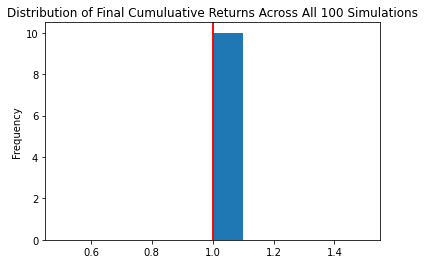

In [59]:
#plot the distribution of the simulation results
arkk_plot_distribution = plot_distribution(arkk_sim_input)


In [60]:
arkk_summary_stats = get_monte_summary(arkk_sim_input)
print(arkk_summary_stats)

count           100.0
mean              1.0
std               0.0
min               1.0
25%               1.0
50%               1.0
75%               1.0
max               1.0
95% CI Lower      1.0
95% CI Upper      1.0
Name: 756, dtype: float64
